# Test fMRI IV analysis

* Using BNU2 data from https://neurodata.io/mri
* ROI parcellation: AAL (see definition [here](../data_bnu2/aal_space-MNI152NLin6_res-2x2x2.json))
* Test on one subject assumed to be pre-downloaded
    * TODO: figure out how to download all subjects' data automatically
* Do "pseudo-IV" analysis using previous timepoint as IV.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import json  # for ROI names

import iv_analysis as iv

### Read in ROI names and data

In [2]:
roi_path = '../data_bnu2/aal_space-MNI152NLin6_res-2x2x2.json'

with open(roi_path) as roi:
    roi_dict = json.load(roi)
    num_rois = max(int(roi_num) for roi_num in roi_dict.keys())
    roi_names = [roi_dict[str(roi_num + 1)]['label'] for roi_num in range(num_rois)]

data_path = '../data_bnu2/sub-0025921_ses-2_bold_aal_res-2x2x2_variant-mean_timeseries.npz'

data_dict = np.load(data_path)
activations = data_dict['roi']
assert activations.shape[0] == num_rois

### Do IV analysis and plot

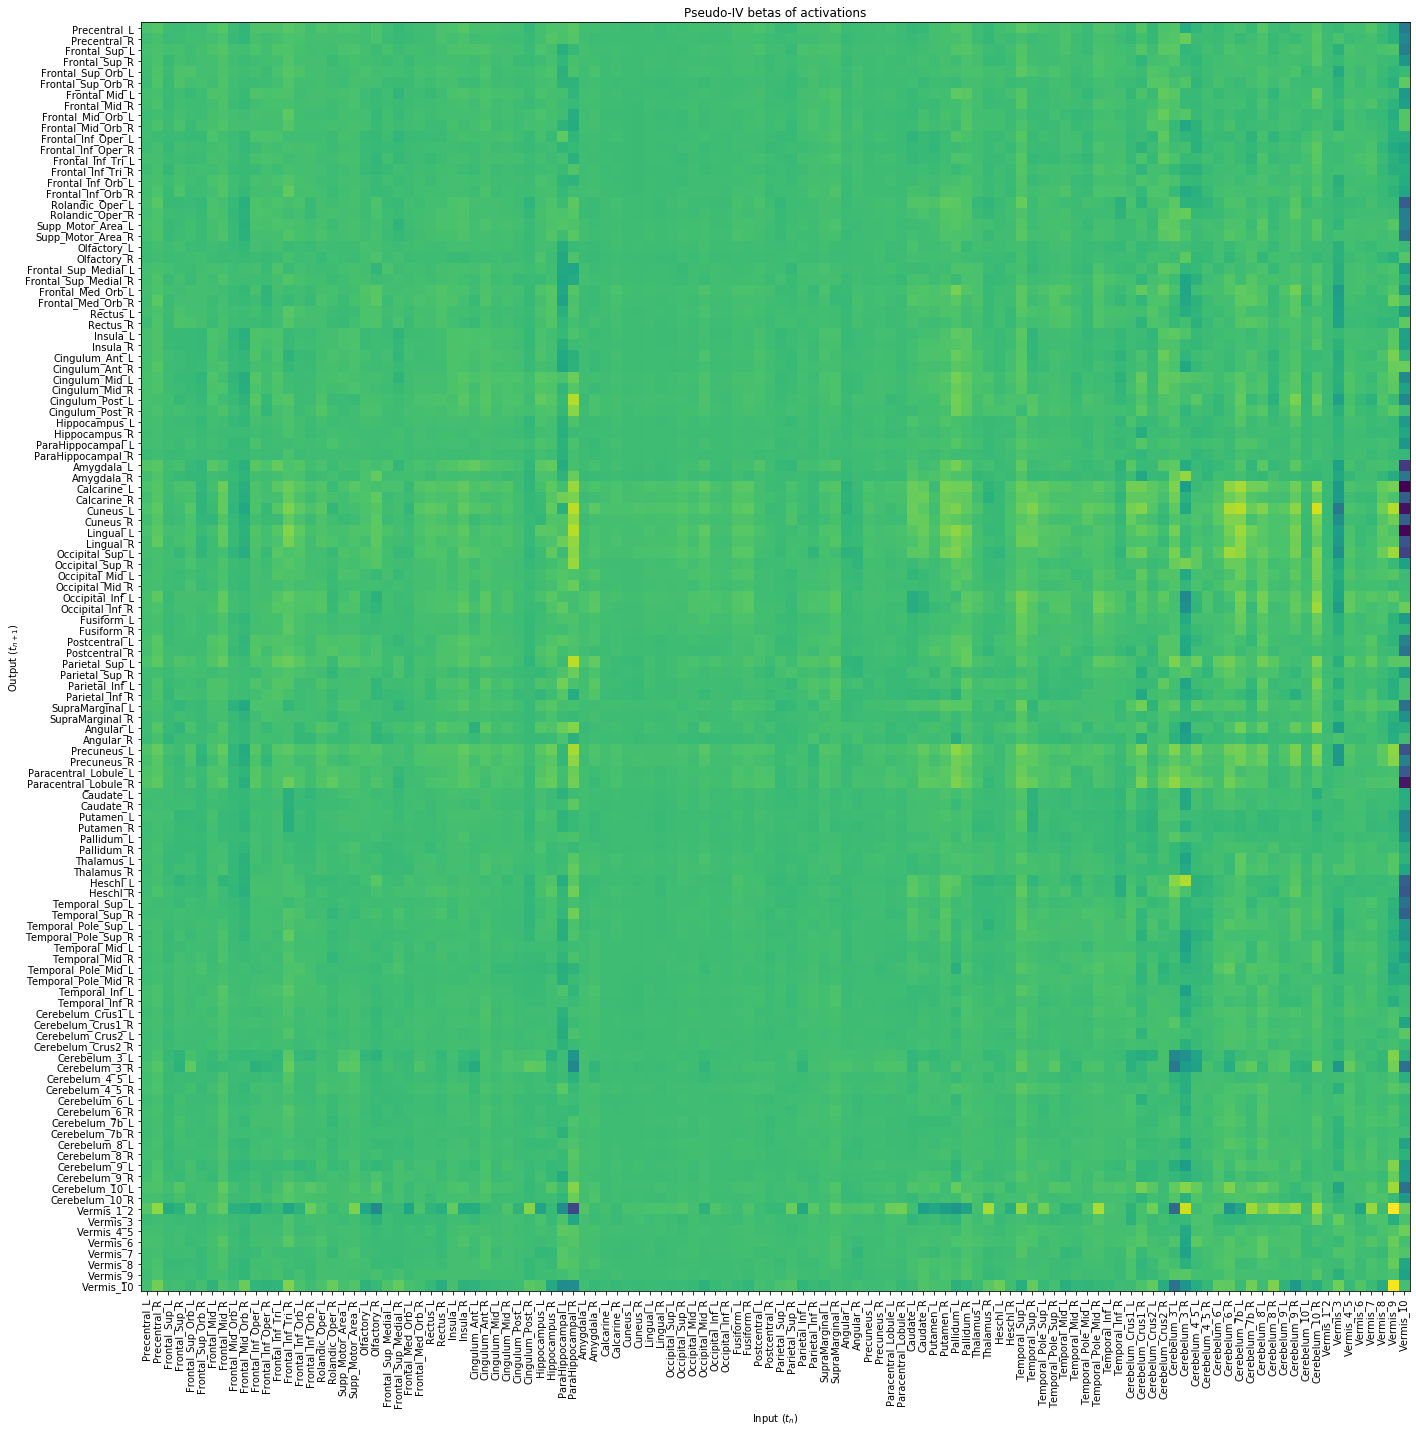

In [3]:
betas = iv.pseudo_iv_betas(activations)
# can't use log-transformed since there are negative activations
# (looks more Gaussian than gamma or lognormal anyway)
# betas_log = iv.pseudo_iv_betas(data, log_transform_input=True)

plt.close(1)
fig = plt.figure(1, (20, 20), tight_layout=True)

axes = fig.subplots()
axes.imshow(betas)
axes.set_title('Pseudo-IV betas of activations')

axes.set_xticks(np.arange(num_rois))
axes.set_yticks(np.arange(num_rois))
axes.set_xlim(-0.5, num_rois - 0.5)
axes.set_ylim(num_rois - 0.5, -0.5)
axes.set_xticklabels(roi_names, rotation='vertical')
axes.set_yticklabels(roi_names)

axes.set_xlabel(r'Input ($t_n$)')
axes.set_ylabel(r'Output ($t_{n+1}$)')

plt.draw()



* Also use correlations for everything
* Scatterplots for correlations
* Heatmaps for avg or median correlation for each type, parameter combinations
* Lastly try to verify assumptions for fMRI data, show they don't hold